In [15]:
from pathlib import Path
import sys
import torch

# Make repo root importable
REPO_ROOT = (Path.cwd() / "..").resolve()
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

# Data and models
DATA_DIR   = REPO_ROOT / "data"
MODELS_DIR = REPO_ROOT / "models"

# Device setup
device = torch.device(
    "mps" if torch.backends.mps.is_available() else
    ("cuda" if torch.cuda.is_available() else "cpu")
)
device

device(type='mps')

In [16]:
import numpy as np
from PIL import Image

# load test data
test_imgs = np.load(DATA_DIR / "kmnist-test-imgs.npz")["arr_0"]

# pick one image (say index 0)
sample = test_imgs[0]

# convert to PIL (uint8 0–255 grayscale)
pil = Image.fromarray(sample.astype(np.uint8), mode="L")

probs, top1, native = predict_from_pil(pil, model_name, ALL_MODELS, device)

print("Predicted:", KMNIST_CLASSES[top1], KANA[KMNIST_CLASSES[top1]])
pil.show()

Predicted: o お


/var/folders/w9/33k1xs6577ddhxr4j4h706qr0000gn/T/ipykernel_36177/1396013012.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil = Image.fromarray(sample.astype(np.uint8), mode="L")


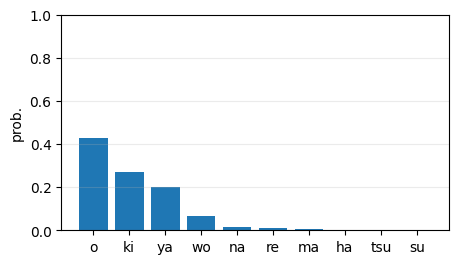

In [17]:
import matplotlib.pyplot as plt
idx = np.argsort(-probs)[:10]
plt.figure(figsize=(5,2.8))
plt.bar(range(len(idx)), probs[idx])
plt.xticks(range(len(idx)), [KMNIST_CLASSES[i] for i in idx])
plt.ylim(0,1); plt.ylabel("prob.")
plt.grid(axis="y", alpha=0.25)
plt.show()